# Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import sys
sys.path.append("../")

# Carregamento do dataset

In [8]:
df = pd.read_csv('../data/tempo.csv', sep=";")

## Inicio da analise exploratoria

In [43]:
colunas = df.columns
dados = df.info()
informacao = df.shape
print(colunas)
print(dados)
print(f"o dataset possui nº de registro em (registros, caracteristicas) {informacao}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      14 non-null     float64
 3   Vento        14 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')
None
o dataset possui nº de registro em (registros, caracteristicas) (14, 5)


In [12]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


### Tratamento dos valor 'null'

In [44]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [32]:
faltante= df["Umidade"].isnull()
print(df[faltante])

Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []


In [28]:
df['Umidade'].describe()
mediana = sts.median(df['Umidade'])
print(mediana)

85.5


In [30]:
df.loc[df["Umidade"].isnull(), "Umidade"] = mediana

In [34]:
faltante = df['Vento'].isnull()
print(df[faltante])

  Aparencia  Temperatura  Umidade Vento Jogar
9     chuva           75    200.0   NaN   sim


In [42]:
df.groupby(df['Vento']).size()

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [41]:
df.loc[df["Vento"].isnull(), "Vento"] = 'FALSO'

### Tratamento de outlier

* temperatura descrita em fahrenheit

In [52]:
df["Temperatura"].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [49]:
alta_temp = df['Temperatura'] > 125
df[alta_temp]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [50]:
mediana = sts.median(df['Temperatura'])
mediana

73.5

{'whiskers': [<matplotlib.lines.Line2D at 0x202b21c64d0>,
 'caps': [<matplotlib.lines.Line2D at 0x202ae4e5710>,
 'boxes': [<matplotlib.lines.Line2D at 0x202b21c5e90>],
 'medians': [<matplotlib.lines.Line2D at 0x202ae484b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x202aed85310>],
 'means': []}

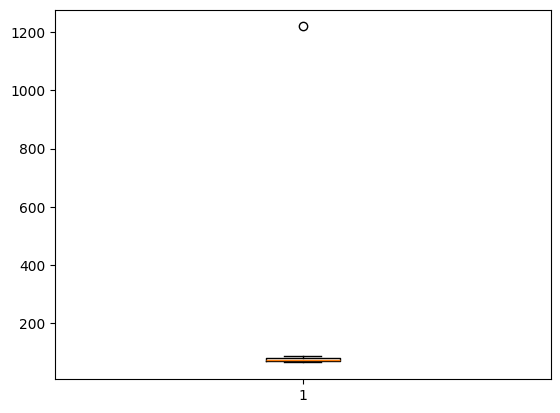

In [46]:
plt.boxplot(df["Temperatura"])

In [51]:
df.loc[df['Temperatura'] > 125, "Temperatura"] = mediana

C:\Users\dyego\AppData\Local\Temp\ipykernel_26152\521188817.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Temperatura'] > 125, "Temperatura"] = mediana


In [62]:
df['Umidade'].describe()

count    14.000000
mean     81.267857
std       9.576847
min      65.000000
25%      71.250000
50%      85.125000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [59]:
umidade = df['Umidade'] > 100
df[umidade]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [60]:
mediana = sts.median(df['Umidade'])
mediana

85.25

In [61]:
df.loc[df['Umidade'] > 100, "Umidade"] = mediana

{'whiskers': [<matplotlib.lines.Line2D at 0x202b4f86610>,
 'caps': [<matplotlib.lines.Line2D at 0x202b4f87950>,
 'boxes': [<matplotlib.lines.Line2D at 0x202b4f85d10>],
 'medians': [<matplotlib.lines.Line2D at 0x202b4f8ca10>],
 'fliers': [<matplotlib.lines.Line2D at 0x202b4f8d550>],
 'means': []}

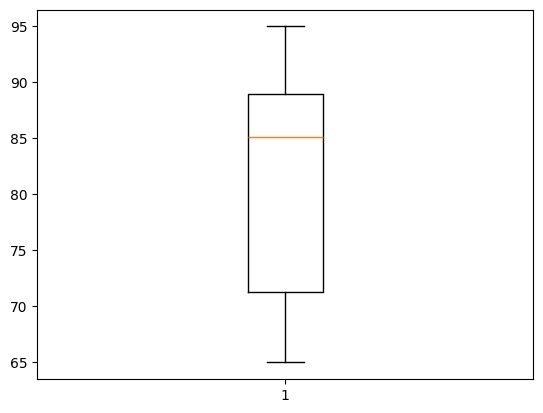

In [65]:
plt.boxplot(df['Umidade'])